In [ ]:
#Jane Anna Vickery

In [9]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import keras

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils   # NumPy related tools
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
#7

In [11]:
my_df = pd.read_csv('Default.csv')
print(my_df)


     default student      balance        income
0         No      No   729.526495  44361.625074
1         No     Yes   817.180407  12106.134700
2         No      No  1073.549164  31767.138947
3         No      No   529.250605  35704.493935
4         No      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995      No      No   711.555020  52992.378914
9996      No      No   757.962918  19660.721768
9997      No      No   845.411989  58636.156984
9998      No      No  1569.009053  36669.112365
9999      No     Yes   200.922183  16862.952321

[10000 rows x 4 columns]


In [12]:
df=pd.read_csv('Default.csv')
print(df.head())
X=df.loc[:,'default':'income']
Y=df.default
Y.replace(['Yes', 'No'],[1, 0], inplace=True)
print(Y.head())
y=np.zeros((len(Y),1))
y[:,0] = Y
#X_train=X; y_train=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64


In [13]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (8000, 4)
y_train shape (8000, 1)
X_test shape (2000, 4)
y_test shape (2000, 1)


In [14]:
# The Sequential model is a linear stack of layers and is very common.
model = Sequential()

2022-11-29 14:10:27.990563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Each node will receive an element from each input vector and apply some weight and bias to it.
model.add(Dense(10, input_shape=(100,))) 

In [16]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.
model.add(Activation('relu'))

In [17]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [18]:
# Summarize the built model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1010      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________


In [19]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import re

In [46]:
#12
# Load the dataset
my_df = pd.read_csv('NYSE.csv')


# Load all needed information
L = my_df.loc[:,['DJ_return','log_volume','log_volatility','train','day_of_week']]
#changing string values in day_of_week column to interger values
L.day_of_week.replace(['mon','tues','wed','thur','fri'],[1,2,3,4,5],inplace = True)

# Create lagged sequences 
L['v1']=L.loc[:,'log_volume'].shift(1)
L['v2']=L.loc[:,'log_volume'].shift(2)
L['v3']=L.loc[:,'log_volume'].shift(3)
L['v4']=L.loc[:,'log_volume'].shift(4)
L['v5']=L.loc[:,'log_volume'].shift(5)
L['r1']=L.loc[:,'DJ_return'].shift(1)
L['r2']=L.loc[:,'DJ_return'].shift(2)
L['r3']=L.loc[:,'DJ_return'].shift(3)
L['r4']=L.loc[:,'DJ_return'].shift(4)
L['r5']=L.loc[:,'DJ_return'].shift(5)
L['z1']=L.loc[:,'log_volatility'].shift(1)
L['z2']=L.loc[:,'log_volatility'].shift(2)
L['z3']=L.loc[:,'log_volatility'].shift(3)
L['z4']=L.loc[:,'log_volatility'].shift(4)
L['z5']=L.loc[:,'log_volatility'].shift(5)
L['q1']=L.loc[:,'day_of_week'].shift(1)
L['q2']=L.loc[:,'day_of_week'].shift(2)
L['q3']=L.loc[:,'day_of_week'].shift(3)
L['q4']=L.loc[:,'day_of_week'].shift(4)
L['q5']=L.loc[:,'day_of_week'].shift(5)




L=L.dropna()


train_X = L[L['train']==True]
test_X = L[L['train']==False]
train_y = train_X.loc[:,['log_volume']]
test_y = test_X.loc[:,['log_volume']]

train_X=train_X.drop(columns=['train','log_volume','DJ_return','log_volatility','day_of_week'])
test_X=test_X.drop(columns=['train','log_volume','DJ_return','log_volatility','day_of_week'])



# convert dataframe to ndarray thus reshape() is possible
train_X=train_X.values
test_X=test_X.values
train_y=train_y.values
test_y=test_y.values

train_X = train_X.reshape((train_X.shape[0], 5, 4))
test_X = test_X.reshape((test_X.shape[0], 5, 4))







Epoch 1/50
60/60 - 1s - loss: 0.1935 - val_loss: 0.1798 - 1s/epoch - 20ms/step
Epoch 2/50
60/60 - 0s - loss: 0.1804 - val_loss: 0.1702 - 171ms/epoch - 3ms/step
Epoch 3/50
60/60 - 0s - loss: 0.1621 - val_loss: 0.1501 - 162ms/epoch - 3ms/step
Epoch 4/50
60/60 - 0s - loss: 0.1340 - val_loss: 0.1433 - 163ms/epoch - 3ms/step
Epoch 5/50
60/60 - 0s - loss: 0.1266 - val_loss: 0.1406 - 163ms/epoch - 3ms/step
Epoch 6/50
60/60 - 0s - loss: 0.1237 - val_loss: 0.1391 - 163ms/epoch - 3ms/step
Epoch 7/50
60/60 - 0s - loss: 0.1212 - val_loss: 0.1387 - 163ms/epoch - 3ms/step
Epoch 8/50
60/60 - 0s - loss: 0.1206 - val_loss: 0.1382 - 162ms/epoch - 3ms/step
Epoch 9/50
60/60 - 0s - loss: 0.1196 - val_loss: 0.1376 - 164ms/epoch - 3ms/step
Epoch 10/50
60/60 - 0s - loss: 0.1189 - val_loss: 0.1372 - 165ms/epoch - 3ms/step
Epoch 11/50
60/60 - 0s - loss: 0.1190 - val_loss: 0.1368 - 163ms/epoch - 3ms/step
Epoch 12/50
60/60 - 0s - loss: 0.1183 - val_loss: 0.1363 - 176ms/epoch - 3ms/step
Epoch 13/50
60/60 - 0s - lo

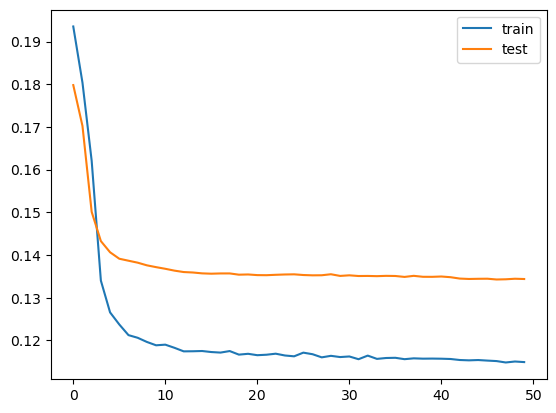

56/56 [==============================] - 0s 776us/step
Test RMSE: 0.183


In [47]:
#12
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
yhat = model.predict(test_X)

# calculate RMSE
rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)